## Iterative Methods to Solve System of equations

### 1. Richardson Method   2. Jacobi Method

### Problem Statement

#### Given Boundry Value Problem
\begin{align*}
&-\frac{\partial^2 u}{\partial x^2} + u = 2\sin{x}\quad \forall x \in (0, \pi)\\
& \quad\quad u(0)= 0 = u(\pi)\\
\end{align*}

Given uniform partition 

$$\left\{x_{j}\in [0,\pi]: j =0,1,\ldots,M+1\right\}$$ $$x_{j}=j\delta x,\quad \delta x = \pi /(M+1)$$ 

of the interval $[0,\pi]$ and let $U_{j}$ denotes the approximation of $u$ at point $x_{j}$, that is, $U_{j}\approx u(x_{j})$.

Given Finite Difference Approximation 

\begin{align*}
&\frac{-U_{j-1} + 2U_{j} - U_{j+1}}{{\delta x}^2} + U_{j} = 2\sin(x_{j})
\end{align*}

### Kindly Note that only linear systems for which spectral radius is less than 1 converge to solution of system of equation Ax = b


### Step-I: Import required modules

In [2]:
from numpy import zeros, linspace, dot, sin, pi, identity, linalg
import time
import matplotlib.pyplot as plt
from matplotlib import animation, rc ## Needed for animation

### Step-II : Partitioning the domain  $[0,\pi]$

In [3]:
def unipart(M):  #uniform partition
    x = linspace(0,pi,M+2)  #points in plane
    dx = (pi-0)/(M+1)  # dx := 𝛿𝑥
    return x,dx

### Step-III: Define  the exact solution

In [4]:
def uexact(x):
    return sin(x)  

In [9]:
def matrixA_F_D(M): 
    A = zeros((M,M))
    x,dx = unipart(M)
    dx = (pi-0)/(M+1)  # dx := 𝛿𝑥
    A[0][0] = 2 + (dx)**2
    A[0][1] = -1 
    for j in range(1,M-1):
        A[j][j-1] = A[j][j+1] = -1
        A[j][j] = 2 + (dx)**2
    A[M-1][M-1] = 2 + (dx)**2
    A[M-1][M-2] = -1
    
    F = zeros((M,1))
    for j in range(1,M+1):
        F[j-1] = (2*(dx)**2)*sin(x[j])
    
    D = zeros((M,M))
    for j in range(M):
        D[j][j] = A[j][j]
    return A,F,D
    
    

In [21]:
def iterativeMethod(M,solver,u):  #u := exact solution    
    A,F,D = matrixA_F_D(M)
    I = identity(M) #identity matrix 
    x = zeros((M+2,1))
    n = 0 # to keep track of number of times loop runs
    
    if solver == "Richardson":
        R = A - I 
        while (n<5000):
            x[1:M+1] = F - dot(R,x[1:M+1])
            n = n+1
        return x
    
    if solver == "Jacobi":
        R = A - D
        while (n<3000) :
            x[1:M+1] = linalg.inv(D).dot(F - dot(R,x[1:M+1]))
            n+=1
        return x
    
    

### Plot Solution - Richardson Method

Time Taken(in seconds) :  0.117
Max Error (M = 16) : 0.000000


C:\Users\MAMTA\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


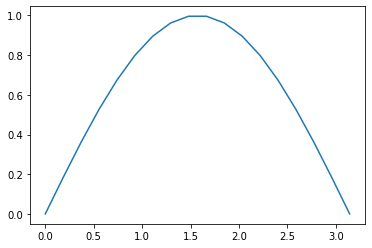

Time Taken(in seconds) :  0.148
Max Error (M = 32) : 0.000000


C:\Users\MAMTA\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


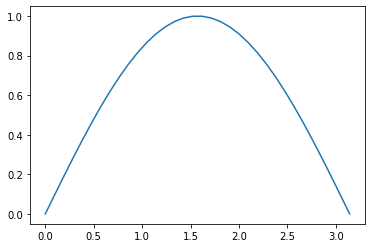

Time Taken(in seconds) :  0.138
Max Error (M = 64) : 0.000000


C:\Users\MAMTA\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


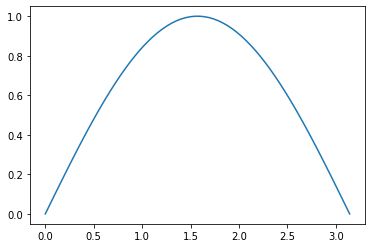

Time Taken(in seconds) :  0.245
Max Error (M = 128) : 0.000000


C:\Users\MAMTA\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


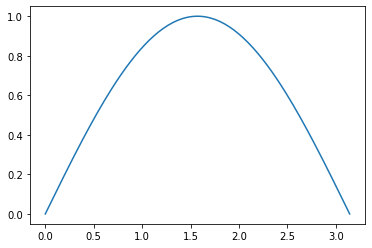

Time Taken(in seconds) :  0.375
Max Error (M = 256) : 0.000000


C:\Users\MAMTA\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


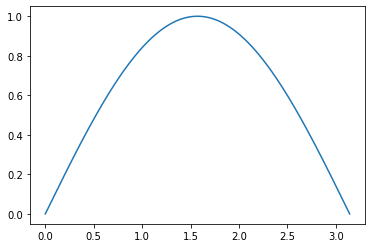

Time Taken(in seconds) :  3.038
Max Error (M = 512) : 0.000000


C:\Users\MAMTA\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


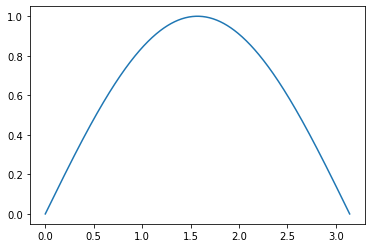

In [22]:

M_set = [16,32,64,128,256,512]
for M in M_set : 
    x,dx = unipart(M)
    u = uexact(x)
    start = time.time()
    U = iterativeMethod(M,"Richardson",u)
    end = time.time()
    print("Time Taken(in seconds) : ",round(end-start,3))
    print("Max Error (M = %d) : %f"%(M,error_calculate(u,U)))
    plt.plot(x,u)
    plt.plot(x,U)
    plt.show()

In [ ]:
#------------------------------------------------------ END OF Q-3 ----------------------------------------------------------

### Plot Solution - Jacobi Method

In [23]:
X=[] #store x at each M
Z=[] #store U at each M
Y=[] #store u at each M
j = 0
M_set = [16,32,64,128,256,512]
for M in M_set : 
    #calculate x,u,U
    x,dx = unipart(M)
    u = uexact(x)
    U = iterativeMethod(M,"Jacobi",u)
    
    #store x,u,U
    X.append(x)
    Y.append(u)
    Z.append(U)

# First set up the figure, the axis, and the plot element we want to animate
fig,ax = plt.subplots()
plt.close()
ax.set_xlim(( 0, pi))
ax.set_ylim((-0.1, 1.1))
ax.set_xlabel('x')
ax.set_ylabel('U')
frame1, = ax.plot([], [], color= 'red', linewidth=2.0, linestyle='-')
frame2, = ax.plot([], [], color= 'blue', linewidth=2.0, linestyle='-')


# initialization function: plot the background of each frame
def init(j=0):
    frame1.set_data(X[j], Y[j]) 
    j+=1
    return (frame1,)

# animation function. This is called sequentially  
def animate(i):
    frame2.set_data(X[i], Z[i])
    ax.set_title('M = %d  Max Error %f: '%(M_set[i],error_calculate(Y[i],Z[i])))
    return (frame2,)

#animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=len(M_set), interval=400, blit=True)

# Output the animation
rc('animation', html='jshtml')
anim
